In [35]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_pickle(r"C:\Users\Admin\Desktop\water-level-estimation\data\B00020S.pkl")

data['Date']=pd.to_datetime(data['Date'])
data['B00020S']= data['B00020S'].str.replace(',', '.').astype(float)


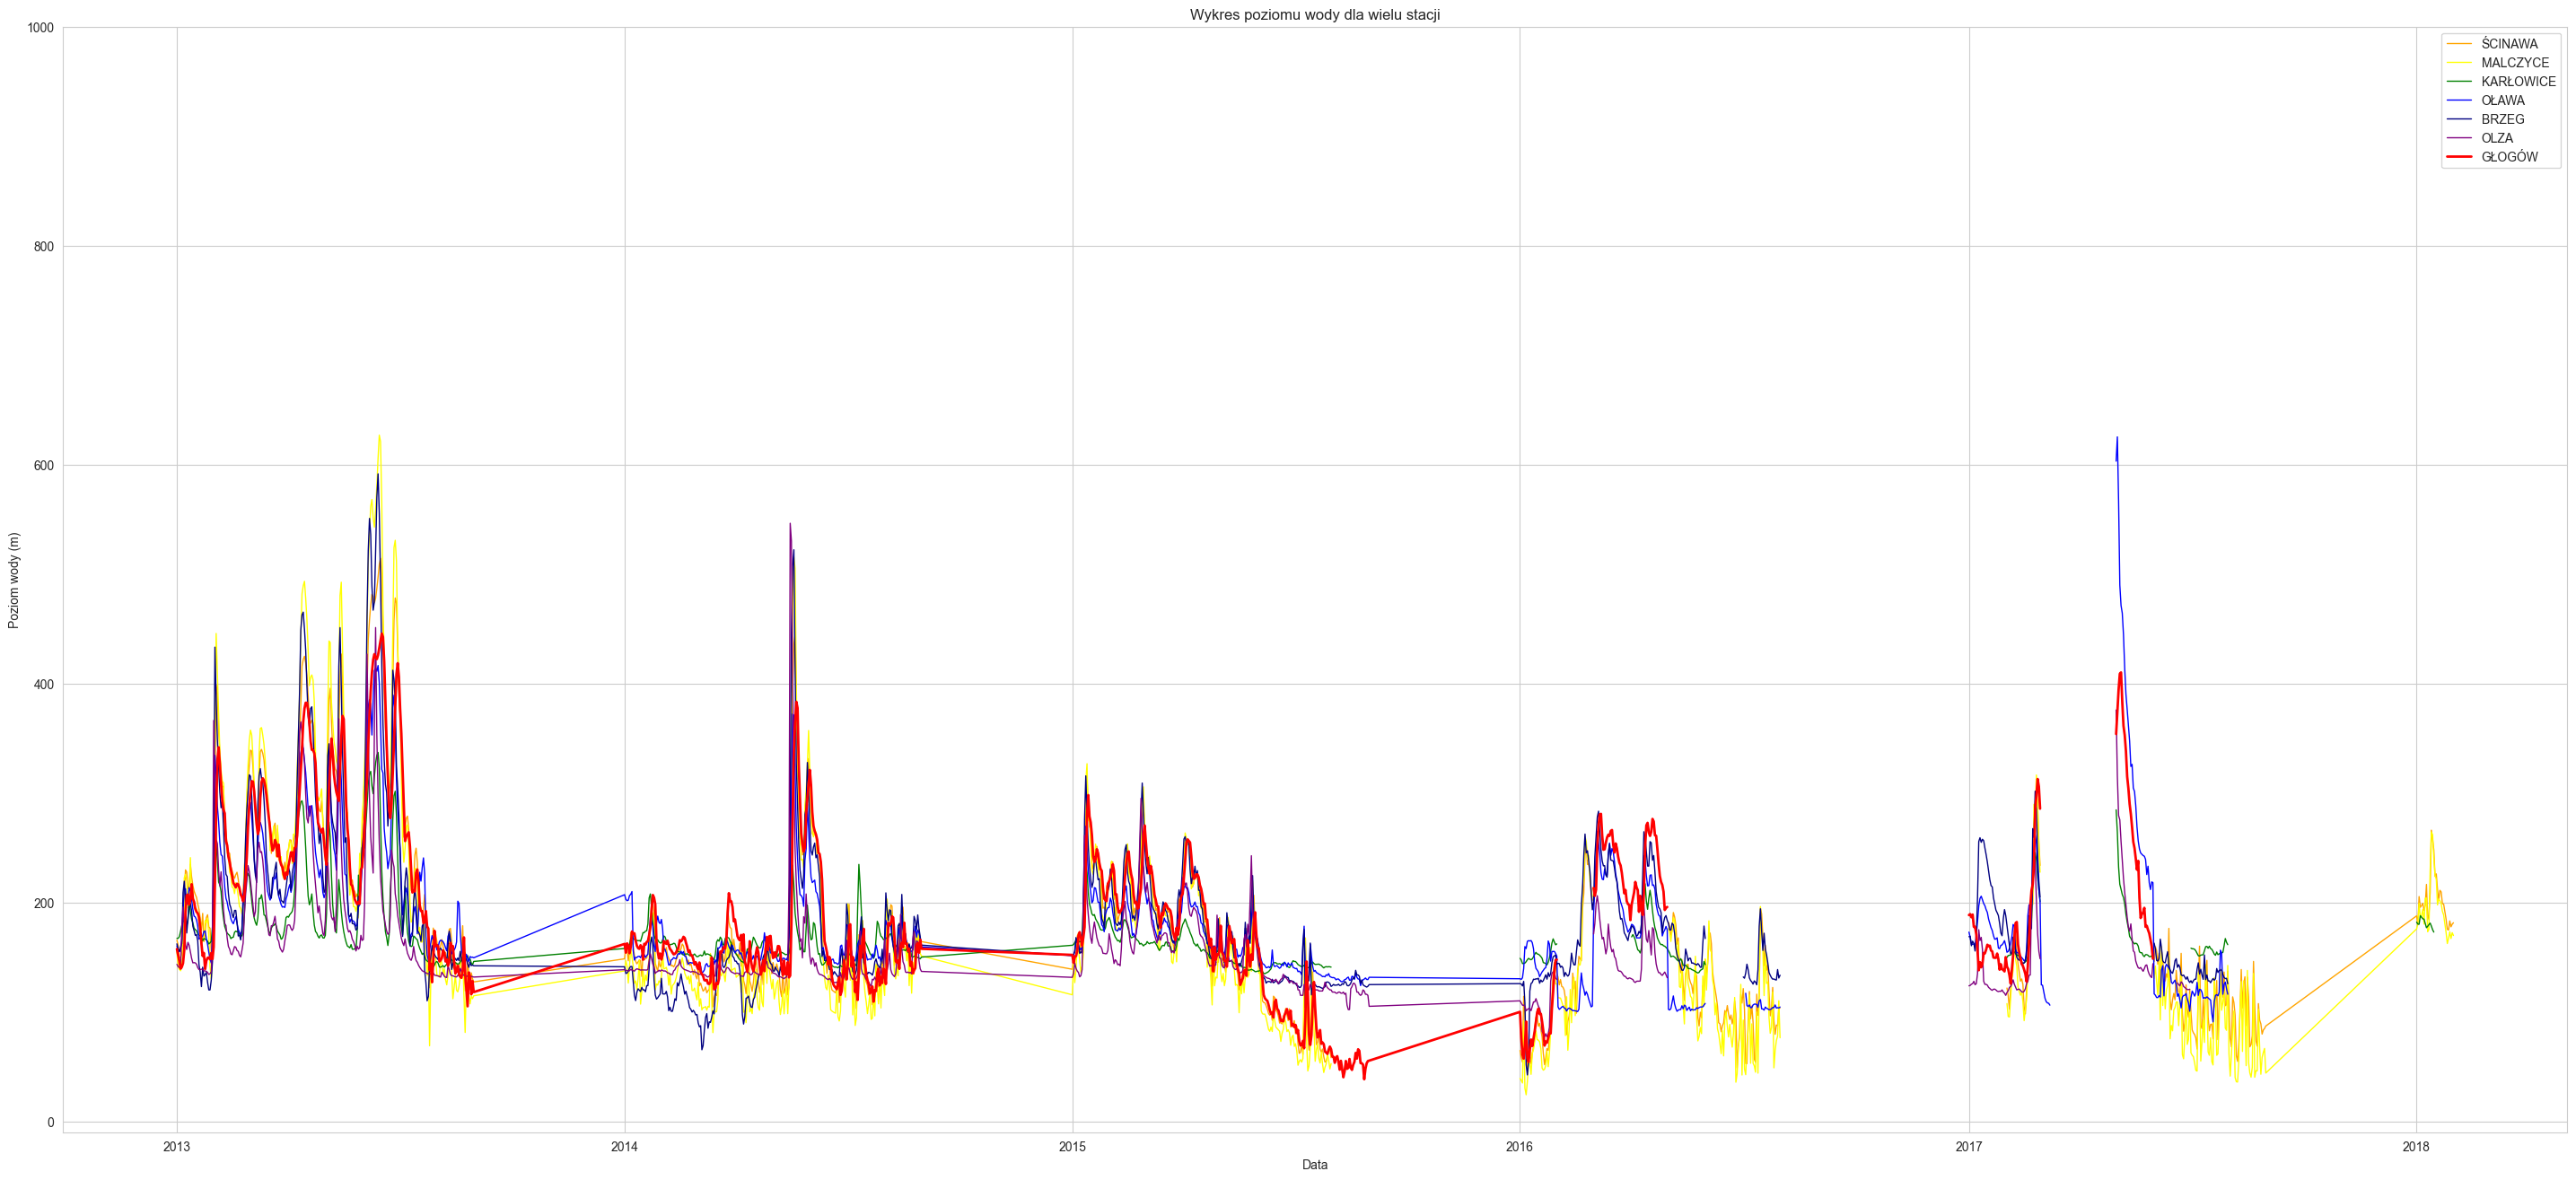

In [36]:
#stations = data['Station'].unique()

stations = ['ŚCINAWA', 'MALCZYCE', 'KARŁOWICE', 'OŁAWA', 'BRZEG', 'OLZA']

fig, ax = plt.subplots()

data_temp = data.groupby(['Date', 'Station'])['B00020S'].mean().reset_index()

# Filtracja po roku
data_temp =  data_temp[(data_temp['Date'].dt.year >= 2013) & (data_temp['Date'].dt.month <= 8)]

custom_palette = [(1.0, 0.647, 0.0), (1.0, 1.0, 0.0), (0.0, 0.502, 0.0), (0.0, 0.0, 1.0), (0.0, 0.0, 0.502), (0.502, 0.0, 0.502)]

for i, station in enumerate(stations):
    data_station = data_temp[data_temp['Station'] == station]

    # Dostosuj kolor linii
    color = custom_palette[i]  # Wybierz kolor z palety
    ax.plot(data_station['Date'], data_station['B00020S'], label=station, linewidth=1, color=color)

# Dla 'GŁOGÓW' użyj koloru czerwonego
data_station_glogow = data_temp[data_temp['Station'] == 'GŁOGÓW']
ax.plot(data_station_glogow['Date'], data_station_glogow['B00020S']-90, label='GŁOGÓW', linewidth=2, color='red')

ax.legend()

ax.set_xlabel('Data')
ax.set_ylabel('Poziom wody (m)')
ax.set_title('Wykres poziomu wody dla wielu stacji')

fig.set_size_inches(36, 16)

# Limity dla czytelności
#plt.xlim(data_temp['Date'].min(), data_temp['Date'].max())
plt.ylim(-10, 1000)
plt.show()
